In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [60]:
%config IPCompleter.greedy=True

In [61]:
abalone_train = pd.read_csv(
    "D:\data_sp500_only_no_title.csv",
    dtype={'DATE':int,'SP500':float},
    names=["DATE", "SP500"])

abalone_train.head()

,DATE,SP500
0,1491226200,2363.6101
1,1491226260,2364.1001
2,1491226320,2362.6799
3,1491226380,2364.3101
4,1491226440,2364.8501


In [62]:
# abalone_train['SP500'] = pd.to_numeric(abalone_train['SP500'], errors='ignore')
# abalone_train['SP500'].dtype
# abalone_train['SP500']

In [63]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('SP500')
print(abalone_labels)
print(abalone_features)
abalone_features_train = abalone_features[:-10000]
abalone_labels_train = abalone_labels[:-10000]
abalone_features_test = abalone_features[-10000:]
abalone_labels_test = abalone_labels[-10000:]

0        2363.6101
1        2364.1001
2        2362.6799
3        2364.3101
4        2364.8501
           ...    
41261    2472.2200
41262    2471.7700
41263    2470.0300
41264    2471.4900
41265    2471.4900
Name: SP500, Length: 41266, dtype: float64
             DATE
0      1491226200
1      1491226260
2      1491226320
3      1491226380
4      1491226440
...           ...
41261  1504209360
41262  1504209420
41263  1504209480
41264  1504209540
41265  1504209600

[41266 rows x 1 columns]


In [64]:
abalone_features_train = np.array(abalone_features_train)
abalone_features_train

array([[1491226200],
       [1491226260],
       [1491226320],
       ...,
       [1501171980],
       [1501172040],
       [1501172100]])

In [65]:
normalize = preprocessing.Normalization()
normalize.adapt(abalone_features_train)

abalone_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1)),
    normalize,
  layers.Dense(1),
  layers.Dense(64),
  layers.Dense(1)
])

#optimizer = tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)
abalone_model.compile(loss=tf.keras.losses.Huber(),
 #           optimizer=optimizer,
            metrics=['mae'])

In [70]:
history = abalone_model.fit(abalone_features_train, abalone_labels_train, epochs=100)

Epoch 1/100
978/978 [==============================] - 1s 828us/step - loss: 10.4614 - mae: 10.9494
Epoch 2/100
978/978 [==============================] - 1s 855us/step - loss: 10.4525 - mae: 10.9403
Epoch 3/100
978/978 [==============================] - 1s 813us/step - loss: 10.4400 - mae: 10.9276
Epoch 4/100
978/978 [==============================] - 1s 796us/step - loss: 10.4440 - mae: 10.9316
Epoch 5/100
978/978 [==============================] - 1s 828us/step - loss: 10.4415 - mae: 10.9287
Epoch 6/100
978/978 [==============================] - 1s 687us/step - loss: 10.4539 - mae: 10.9420
Epoch 7/100
978/978 [==============================] - 1s 654us/step - loss: 10.4509 - mae: 10.9386
Epoch 8/100
978/978 [==============================] - 1s 720us/step - loss: 10.4576 - mae: 10.9454
Epoch 9/100
978/978 [==============================] - 1s 783us/step - loss: 10.4451 - mae: 10.9328
Epoch 10/100
978/978 [==============================] - 1s 772us/step - loss: 10.4551 - mae: 10.9429

In [67]:
print(history.history)
#plt.semilogx(history.history["lr"],history.history["loss"])
#plt.axis([1e-8,1e-4,0,30])

{'loss': [2364.163818359375, 1993.76806640625, 942.9690551757812, 53.67709732055664, 10.45103931427002, 10.455896377563477, 10.439366340637207, 10.45239543914795, 10.451729774475098, 10.437686920166016], 'mae': [2364.663818359375, 1994.26806640625, 943.468994140625, 54.1688117980957, 10.938934326171875, 10.943652153015137, 10.926024436950684, 10.939628601074219, 10.938729286193848, 10.925466537475586]}


In [68]:
abalone_model.evaluate(abalone_features_test)

313/313 [==============================] - 0s 648us/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [77]:
abalone_model_predict = abalone_model.predict(abalone_features_test)


SyntaxError: invalid syntax (<ipython-input-77-a506d2d5c94c>, line 2)

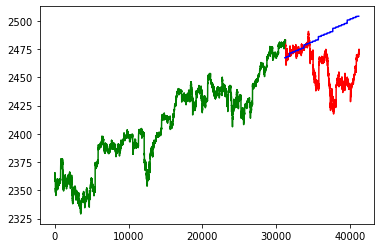

In [81]:
plt.plot(abalone_labels_test,'r')
plt.plot(np.linspace(31200,41200,10000),abalone_model_predict,'b')
plt.plot(abalone_labels_train,'g')